In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\lenovo\Downloads\traffic_accidents.csv")
print(df.head())


   Accident_ID       Date    City Weather Vehicles_Involved  Casualties  \
0          101  1/15/2023   Delhi   Clear                 2           1   
1          102  2/10/2023  Mumbai   Rainy                 1           3   
2          103   3/5/2023  Bhopal     Fog                 3           0   
3          104  3/25/2023  Indore   Clear                 2           0   
4          105  4/12/2023    Pune   Clear                 1           2   

  Severity  
0      Low  
1     High  
2   Medium  
3      Low  
4     High  


In [4]:
df.describe()

,Accident_ID,Casualties
count,8.00000,8.000000
mean,104.50000,1.250000
std,2.44949,1.035098
min,101.00000,0.000000
25%,102.75000,0.750000
50%,104.50000,1.000000
75%,106.25000,2.000000
max,108.00000,3.000000


In [6]:
df.tail(3)

,Accident_ID,Date,City,Weather,Vehicles_Involved,Casualties,Severity
5,106,5/8/2023,Delhi,Rainy,2,1,Low
6,107,5/20/2023,Bhopal,Fog,s,1,Medium
7,108,6/1/2023,Mumbai,Clear,3,2,High


In [8]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
df = pd.read_csv(r"C:\Users\lenovo\Downloads\traffic_accidents.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# Step 3: Data Cleaning
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
df.dropna(inplace=True)                  # Drop missing values (basic cleaning)

# Step 4: Feature Engineering
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.day_name()

print(df[['Date', 'Month', 'Day_of_Week']].head())


Dataset Shape: (8, 7)
   Accident_ID       Date    City Weather Vehicles_Involved  Casualties  \
0          101  1/15/2023   Delhi   Clear                 2           1   
1          102  2/10/2023  Mumbai   Rainy                 1           3   
2          103   3/5/2023  Bhopal     Fog                 3           0   
3          104  3/25/2023  Indore   Clear                 2           0   
4          105  4/12/2023    Pune   Clear                 1           2   

  Severity  
0      Low  
1     High  
2   Medium  
3      Low  
4     High  
        Date  Month Day_of_Week
0 2023-01-15      1      Sunday
1 2023-02-10      2      Friday
2 2023-03-05      3      Sunday
3 2023-03-25      3    Saturday
4 2023-04-12      4   Wednesday


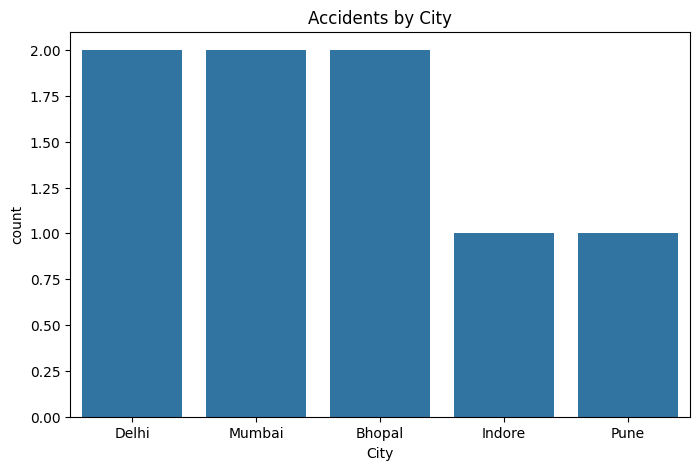

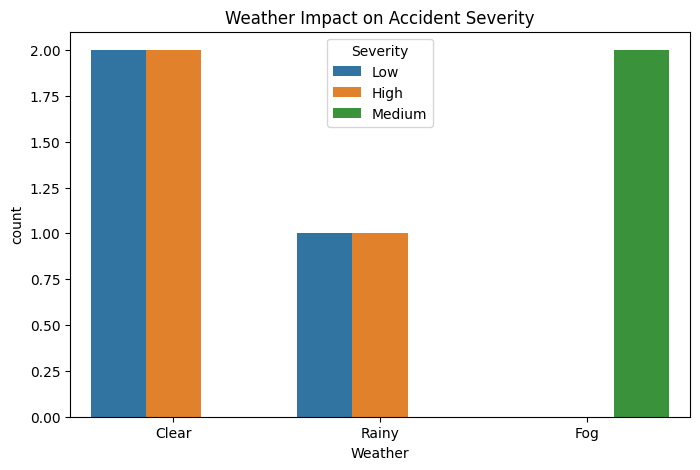

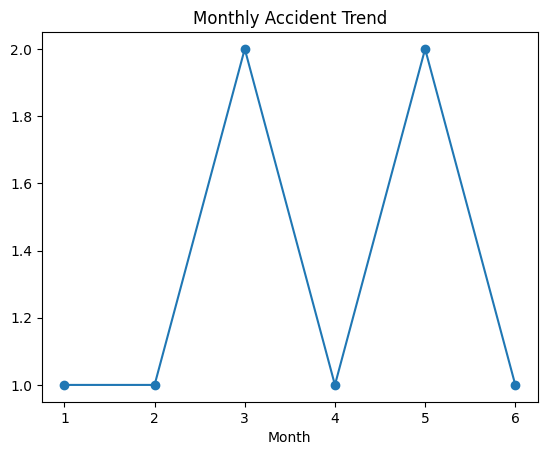

In [11]:
# City-wise accident count
plt.figure(figsize=(8,5))
sns.countplot(x="City", data=df)
plt.title("Accidents by City")
plt.show()

# Weather vs Severity
plt.figure(figsize=(8,5))
sns.countplot(x="Weather", hue="Severity", data=df)
plt.title("Weather Impact on Accident Severity")
plt.show()

# Time trend
df.groupby("Month")["Accident_ID"].count().plot(kind="line", marker="o")
plt.title("Monthly Accident Trend")
plt.show()
